## This notebook is for the plotting of MACS D$_3$LiIr$_2$O$_6$ data before removal of phonon and elastic backgrounds. 

Annular absorption and normalization are handeled previously

In [1]:
import sys
import os 
sys.path.append("../python scripts/")

import numpy as np 
import matplotlib.pyplot as plt
from mantid.simpleapi import *
import matplotlib
import matplotlib.patheffects as PathEffects
import MDUtils as mdu
from mdtoiexy import make_MD_from_iexy

plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.top']=True
plt.rcParams['ytick.right']=True
plt.rcParams['font.size']=10
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10
plt.rcParams['text.usetex']=False
plt.rcParams['font.family']='serif'


def mask_zeros_md(md):
    I = np.copy(md.getSignalArray())
    I[I==0]=np.nan
    md.setSignalArray(I)

cwd = os.getcwd()
#Import files
macs_2K_3p7_fname = cwd+'/macs_iexy/2K_EmptySubtracted_Ei3p7_MACS.iexy'
macs_2K_5_fname = cwd+'/macs_iexy/2K_EmptySubtracted_MACS.iexy'
macs_55K_3p7_fname = cwd+'/macs_iexy/55K_EmptySubtracted_Ei3p7_MACS.iexy'
macs_55K_5_fname = cwd+'/macs_iexy/55K_EmptySubtracted_MACS.iexy'

#Below factors are in a different notebook, originate from elastic bragg peaks
scale_factor_5p0=1.5e-2
scale_factor_3p7=8.0e-2

#scale_factor_5p0=1.0
#scale_factor_3p7=1.0


#Import the iexy files as MDHistoworkspaces
macs_2K_3p7 =  make_MD_from_iexy(macs_2K_3p7_fname,Ei=3.7).clone()
macs_2K_5 =  make_MD_from_iexy(macs_2K_5_fname,Ei=13.7).clone()

macs_55K_3p7 = make_MD_from_iexy(macs_55K_3p7_fname,Ei=3.7).clone()
macs_55K_5 = make_MD_from_iexy(macs_55K_5_fname,Ei=13.7).clone()

macs_55K_5 *=scale_factor_5p0
macs_2K_5 *=scale_factor_5p0
macs_55K_3p7*=scale_factor_3p7 
macs_2K_3p7 *=scale_factor_3p7 

fnames = ['macs_5p0_55K.nxs','macs_5p0_2K.nxs','macs_3p7_55K.nxs','macs_3p7_2K.nxs']

savedir = '../MDHisto_files/'
print(savedir)
for i,md in enumerate([macs_55K_5,macs_2K_5,macs_55K_3p7,macs_2K_3p7]):
    mask_zeros_md(md)
    #Save each in an nxs file for later notebooks.
    SaveMD(md,savedir+fnames[i])

FrameworkManager-[Notice] Welcome to Mantid 6.7.0
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid6.7
CheckMantidVersion-[Notice] A new version of Mantid(6.8.0) is available for download from https://download.mantidproject.org
CreateMDHistoWorkspace-[Notice] CreateMDHistoWorkspace started
CreateMDHistoWorkspace-[Notice] CreateMDHistoWorkspace successful, Duration 0.00 seconds
CloneWorkspace-[Notice] CloneWorkspace started
CloneWorkspace-[Notice] CloneWorkspace successful, Duration 0.00 seconds
CloneWorkspace-[Notice] CloneWorkspace started
CloneWorkspace-[Notice] CloneWorkspace successful, Duration 0.00 seconds
CreateMDHistoWorkspace-[Notice] CreateMDHistoWorkspace started
CreateMDHistoWorkspace-[Notice] CreateMDHistoWorkspace successful, Duration 0.00 seconds
CloneWorkspace-[Notice] CloneWorkspace started
CloneWorkspace-[Notice] CloneWorkspace successful, Duration 0.00 seconds
CloneWorkspace

## First make plots showing each measurement. 

In [2]:
fig,ax = plt.subplots(2,2,figsize=(3.54,4),subplot_kw={'projection':'mantid'})

vmax=1

ax[0,0].pcolormesh(macs_2K_3p7,vmin=0,vmax=vmax,cmap='Spectral_r',rasterized=True)
ax[0,1].pcolormesh(macs_55K_3p7,vmin=0,vmax=vmax,cmap='Spectral_r',rasterized=True)
ax[1,0].pcolormesh(macs_2K_5,vmin=0,vmax=vmax,cmap='Spectral_r',rasterized=True)
mesh = ax[1,1].pcolormesh(macs_55K_5,vmin=0,vmax=vmax,cmap='Spectral_r',rasterized=True)

ax[0,1].set_ylabel('')
ax[1,1].set_ylabel('')
ax[0,0].set_ylabel('$\hbar\omega$ (meV)')
ax[1,0].set_ylabel('$\hbar\omega$ (meV)')
ax[1,0].set_xlabel('$Q$ ($\AA^{-1}$)')
ax[1,1].set_xlabel('$Q$ ($\AA^{-1}$)')
ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[0,1].set_yticklabels([])
ax[1,1].set_yticklabels([])

ax[0,0].set_xlim(0,2.5)
ax[1,0].set_xlim(0,2.5)
ax[0,1].set_xlim(0,2.5)
ax[1,1].set_xlim(0,2.5)

txta = ax[0,0].text(0.1,0.9,'(a)',transform=ax[0,0].transAxes,horizontalalignment='left',\
            verticalalignment='top')
txtb = ax[0,1].text(0.1,0.9,'(b)',transform=ax[0,1].transAxes,horizontalalignment='left',\
            verticalalignment='top')
txtc = ax[1,0].text(0.1,0.9,'(c)',transform=ax[1,0].transAxes,horizontalalignment='left',\
            verticalalignment='top')
txtd = ax[1,1].text(0.1,0.9,'(d)',transform=ax[1,1].transAxes,horizontalalignment='left',\
            verticalalignment='top')
for txt in [txta,txtb,txtc,txtd]:
    txt.set_path_effects([PathEffects.withStroke(linewidth=2,foreground='w')])
#Add a colorbar
l,b,w,h=ax[0,0].get_position().bounds
cax = fig.add_axes([l+0.0125,b+0.5,0.75,0.02])
labelstr='I($Q,\omega$) (b/eV/sr/Ir)'
cbar = plt.colorbar(mesh,orientation='horizontal',cax=cax,label=labelstr)
cax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))
fig.savefig('HLIO_macs_I_summary.pdf',bbox_inches='tight',dpi=300)



In [3]:
dims = macs_2K_5.getNonIntegratedDimensions()
e = mdu.dim2array(dims[1])
print(e)

[ 0.03365669  0.55426338  1.07487008  1.59547678  2.11608347  2.63669017
  3.15729687  3.67790356  4.19851026  4.71911696  5.23972365  5.76033035
  6.28093705  6.80154374  7.32215044  7.84275714  8.36336383  8.88397053
  9.40457723  9.92518392 10.44579062 10.96639732]


Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


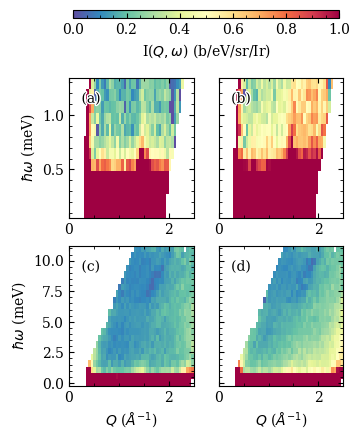

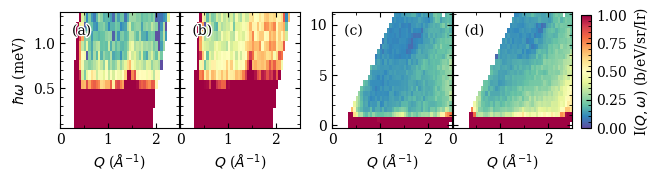

In [4]:
%matplotlib inline
#Version for dissertation
fig,ax = plt.subplots(1,4,figsize=(3.54*2,1.5),subplot_kw={'projection':'mantid'})
fig.subplots_adjust(hspace=0.5)
pos_1 = ax[1].get_position()
pos_0 = ax[0].get_position()
pos_1_w = pos_1.x1 - pos_1.x0
pos_1.x0=pos_0.x0+0.17
pos_1.x1 = pos_1.x0 + pos_1_w

ax[1].set_position(pos_1)


pos_3 = ax[3].get_position()
pos_2 = ax[2].get_position()
#Also want to move ax2 a little to the left. 
pos_2.x0 = pos_2.x0-0.02
pos_2.x1 = pos_2.x1-0.02
ax[2].set_position(pos_2)

pos_3_w = pos_3.x1 - pos_3.x0
pos_3.x0=pos_2.x0+0.17
pos_3.x1 = pos_3.x0 + pos_3_w
ax[3].set_position(pos_3)

vmax=1

ax[0].pcolormesh(macs_2K_3p7,vmin=0,vmax=vmax,cmap='Spectral_r',rasterized=True)
ax[1].pcolormesh(macs_55K_3p7,vmin=0,vmax=vmax,cmap='Spectral_r',rasterized=True)
ax[2].pcolormesh(macs_2K_5,vmin=0,vmax=vmax,cmap='Spectral_r',rasterized=True)
mesh = ax[3].pcolormesh(macs_55K_5,vmin=0,vmax=vmax,cmap='Spectral_r',rasterized=True)

ax[1].set_ylabel('')
ax[3].set_ylabel('')
ax[0].set_ylabel('$\hbar\omega$ (meV)')
ax[2].set_ylabel('')
ax[0].set_xlabel('$Q$ ($\AA^{-1}$)')
ax[1].set_xlabel('$Q$ ($\AA^{-1}$)')
ax[2].set_xlabel('$Q$ ($\AA^{-1}$)')
ax[3].set_xlabel('$Q$ ($\AA^{-1}$)')

ax[1].set_yticklabels([])
ax[3].set_yticklabels([])

ax[0].set_xlim(0,2.5)
ax[1].set_xlim(0,2.5)
ax[2].set_xlim(0,2.5)
ax[3].set_xlim(0,2.5)

txta = ax[0].text(0.1,0.9,'(a)',transform=ax[0].transAxes,horizontalalignment='left',\
            verticalalignment='top')
txtb = ax[1].text(0.1,0.9,'(b)',transform=ax[1].transAxes,horizontalalignment='left',\
            verticalalignment='top')
txtc = ax[2].text(0.1,0.9,'(c)',transform=ax[2].transAxes,horizontalalignment='left',\
            verticalalignment='top')
txtd = ax[3].text(0.1,0.9,'(d)',transform=ax[3].transAxes,horizontalalignment='left',\
            verticalalignment='top')
for txt in [txta,txtb,txtc,txtd]:
    txt.set_path_effects([PathEffects.withStroke(linewidth=2,foreground='w')])
#Add a colorbar
l,b,w,h=ax[3].get_position().bounds
cax = fig.add_axes([l+w+0.0125,b+0.0,0.015,0.75])
labelstr='I($Q,\omega$) (b/eV/sr/Ir)'
cbar = plt.colorbar(mesh,orientation='vertical',cax=cax,label=labelstr)
cax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))

#Fix the x-axis tick labels
for i in range(4):
    axtest = ax[i]
    axtest.set_xticks([0,1,2])
    axtest.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
    axtest.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.5))
fig.savefig('HLIO_macs_I_summary_dissertation.pdf',bbox_inches='tight',dpi=300)
fig.show()